#### 2.4 want to minimize $g(w_0,w_1) = 100(w_1 - w_0^2)^2 + (w_0-1)^2$ using random search and diminishing steplength

In [82]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

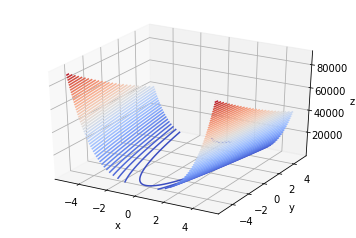

In [83]:
#visualize
from matplotlib import cm
def f(x, y):
    return (100*((y - x**2)**2) + (x - 1)**2)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

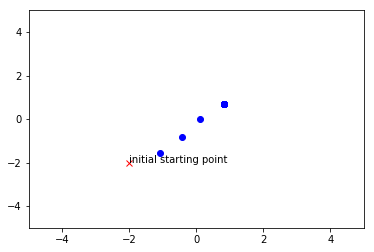

In [87]:
p = 1000
unit_alpha = 1
max_steps = 50
init_point = [-2, -2]
constant_alpha_steps = []
def func_to_evaluate(point):
    return 100*((point[1] - point[0]**2)**2) + (point[0] - 1)**2

def constant_alpha(alpha, num_steps, i_pt):
    min_inputs = []
    min_xy = [i_pt]
    ax = plt.plot(i_pt[0], i_pt[1], 'rx')
    plt.annotate('initial starting point', xy=(i_pt[0], i_pt[1]))
    plt.ylim(-5,5)
    plt.xlim(-5,5)    
    point = i_pt
    for j in range(num_steps):
        min_output = func_to_evaluate(point)
        thetas_tried = []
        for i in range(0,p):
            theta = round(random.uniform(0, 360),2)
            while theta in thetas_tried:
                theta = round(random.uniform(0, 360),2)

            thetas_tried.append(theta)
            x = point[0] + alpha * math.cos(math.radians(theta))
            y = point[1] + alpha * math.sin(math.radians(theta))
            z = func_to_evaluate([x,y])
            if z < min_output:
                min_output = z
                min_xy = [x,y]
        point = min_xy
        plt.plot(min_xy[0], min_xy[1], 'bo')
        constant_alpha_steps.append(min_output)
        min_inputs.append(min_xy)
#     print(constant_alpha_steps)
    
constant_alpha(unit_alpha, max_steps, init_point)

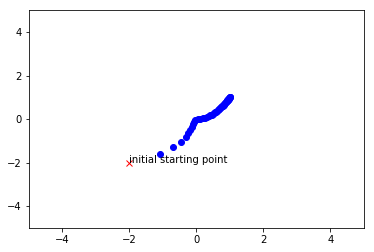

In [88]:
min_inputs = []
diminishing_alpha_steps = []
def diminishing_alpha(num_steps, i_pt):
    min_xy = [i_pt]
    ax = plt.plot(i_pt[0], i_pt[1], 'rx')
    plt.annotate('initial starting point', xy=(i_pt[0], i_pt[1]))
    plt.ylim(-5,5)
    plt.xlim(-5,5)    
    point = i_pt
    for j in range(num_steps):
        alpha = 1/(j+1);
        min_output = func_to_evaluate(point)
        thetas_tried = []
        for i in range(0,p):
            theta = round(random.uniform(0, 360),2)
            while theta in thetas_tried:
                theta = round(random.uniform(0, 360),2)

            thetas_tried.append(theta)
            x = point[0] + alpha * math.cos(math.radians(theta))
            y = point[1] + alpha * math.sin(math.radians(theta))
            z = func_to_evaluate([x,y])
            if z < min_output:
                min_output = z
                min_xy = [x,y]
        point = min_xy
        diminishing_alpha_steps.append(min_output)
        min_inputs.append(min_xy)
        plt.plot(min_xy[0], min_xy[1], 'bo')
    

diminishing_alpha(max_steps, init_point)

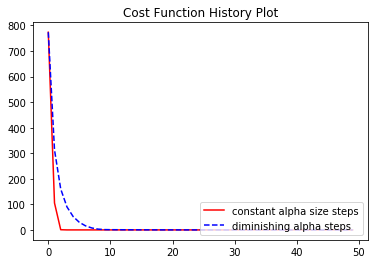

In [89]:
plt.plot(constant_alpha_steps, 'r-', label="constant alpha size steps")
plt.plot(diminishing_alpha_steps, 'b--', label='diminishing alpha steps')
plt.title("Cost Function History Plot")
plt.legend(loc="lower right")